<a href="https://colab.research.google.com/github/WONYOUNG-SONG/DeepLearningTensorFlow2/blob/main/Lab12_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab12: RNN**

# **What is RNN?**

**Recurrent Neural Network (RNN) is a powerful type of neural network that can make sequential predictions or conclusions based on sequential inputs.**

**It works very well for jobs requiring sequences, such as time series data, voice, natural language, and other activities.**

**Unlike traditional neural networks, the output of recurrent neural networks depends on the prior elements within the sequence.**



<div>
  <img src="https://www.simplilearn.com/ice9/free_resources_article_thumb/Simple_Recurrent_Neural_Network.png" width=600>
</div>

# **How Does Recurrent Neural Networks Work?**

<div>
  <img src="https://www.simplilearn.com/ice9/free_resources_article_thumb/Fully_connected_Recurrent_Neural_Network.gif" width=500>
</div>

**The input layer, x, takes in the input to the neural network and processes it and passes it onto the middle layer.**

**The middle layer ‘h’ can consist of multiple hidden layers, each with its own activation functions and weights and biases. If you have a neural network where the various parameters of different hidden layers are not affected by the previous layer, ie: the neural network does not have memory, then you can use a recurrent neural network.**

**The Recurrent Neural Network will standardize the different activation functions and weights and biases so that each hidden layer has the same parameters. Then, instead of creating multiple hidden layers, it will create one and loop over it as many times as required.**

**Note that the same function and the same set of parameters are used at every time step.**

**We can epxress this process mathematically:**

<div>
  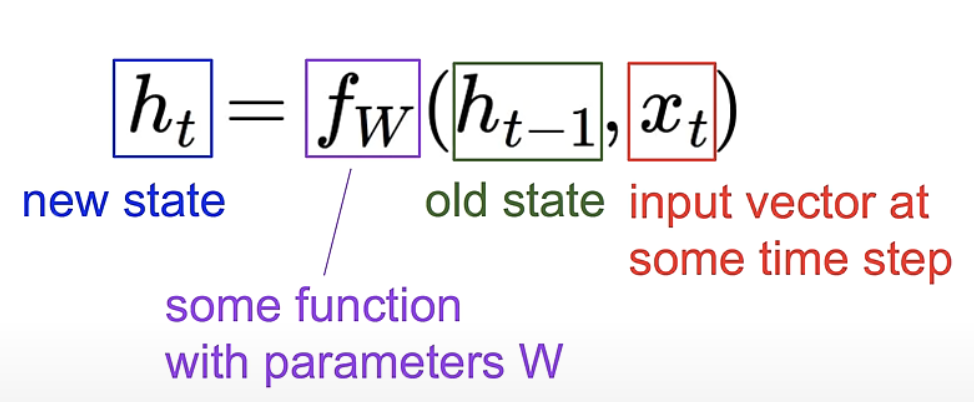
</div>

**Also, the vanilla RNN, which is the state consists of a single hidden vector, h, can be represented:**

$$
h_t = tanh(W_{hh}h_{t-1}+W_{xh}x_t)
$$
$$
y_t=W_{hy}h_t
$$

**RNN usually uses Sigmoid, Tanh, or ReLU as an activation function.**

# **Types of RNNs**

<div>
  <img src="https://www.ibm.com/content/dam/connectedassets-adobe-cms/worldwide-content/creative-assets/s-migr/ul/g/8f/af/recurrent-and-feedforward-neural-networks-one-many.component.m-retina.ts=1728484279316.png/content/adobe-cms/us/en/topics/recurrent-neural-networks/jcr:content/root/table_of_contents/body/content_section_styled/content-section-body/mixed_series/items/simple_series/items/content_block_item/image" width=400>
</div>

* **One-to-One: also called vanila RNN, and it is used for general machine
learning problems, which has a single input and a single output**

* **One-to-Many: it has a single input and multiple outputs, like image to a sequence of words. It can be used for the image caption.**

* **Many-to-One: it takes a sequence of inputs and generates a single output, like a sequence of words to sentiment. It can be used for sentiment classification.**

* **Many-to-Many (more hidden layers): it takes a sequence of input and generates a sequence of output; for example, a sequence of words to a sequence of words. It can be used for machine translation.**

* **Many-to-Many: this one is used for video classification on frame level.**

# **Advantages & Disadvantages of RNN**

**Advantages**

* **RNN is efficient in handling various-length sequences, such as speech recognition, natural language processing, and time series analysis.**

* **Because of its characteristic of memorizing past inputs, RNN is useful for tasks such as language modeling.**

* **RNN shares parameters across all time steps, and this reduces the number of parameters that need to be learned and can lead to better generalization.**

* **RNN uses non-linear activation functions, which allows them to learn complex, non-linear mappings between inputs and outputs.**

* **RNN processes input sequences sequentially, which makes them computationally efficient and easy to parallelize.**

* **RNNs can be used for a variety of applications and input formats, such as audio, picture, and text sequences.**

**Disadvantages**

* **RNN has to process each input in sequence and this can slow the process.**

* **RNN can suffer from the problem of vanishing or exploding gradients when the gradients of the loss function with respect to the parameters become very small or very large as they propagate through time.**

* **Because RNN is inherently sequential, which makes it difficult to parallelize the computation, it can limit the speed and scalability of the network**

**The weakness of the vanishing and exploding gradient problem is the main weakness of the RNN's problems.**

# **RNN Architectures**

* **Standard RNNs:** The most basic version of an RNN, where the output at each time step depends on both the current input and the hidden state from the previous time step, suffers from problems such as vanishing gradients, making it difficult for them to learn long-term dependencies.

* **Bidirectional RNNs (BRNNs):** It process input sequences in both forward and backward directions while unidirectional RNNs can only be drawn from previous inputs to make predictions about the current state. Returning to the example of “feeling under the weather”, a model based on a BRNN can better predict that the second word in that phrase is “under” if it knows that the last word in the sequence is “weather.”

* **Gated recurrent units (GRUs):** It is designed to reduce the vanishing gradient problem. It has two gates: the reset gate and the update gate, which control how much and which information to retain.

* **Encoder-decoder RNNs:** These are commonly used for sequence-to-sequence tasks, such as machine translation. The encoder processes the input sequence into a fixed-length vector (context), and the decoder uses that context to generate the output sequence. However, the fixed-length context vector can be a bottleneck, especially for long input sequences.

* **Long short-term memory (LSTM):** LSTM networks have “cells” in the hidden layers of the artificial neural network, which have 3 gates: an input gate, an output gate and a forget gate. These gates control the flow of information that is needed to predict the output in the network.  For example, if gender pronouns, such as “she”, was repeated multiple times in prior sentences, you might exclude that from the cell state.

reference: https://www.simplilearn.com/tutorials/deep-learning-tutorial/rnn
https://www.ibm.com/topics/recurrent-neural-networks

# **hello RNN**

**Let's make a character-level language model example.**

**As I explained above, RNN predicts the output. For this characteristic it is used for natural language processing.**

**We can try the example training sequence, "hello"**

**The model will predict the next alphabet; for example, the input h will have the output e, and the input e will have the output l.**

**First, we need to encode the string using one hot encode.**

<div>
  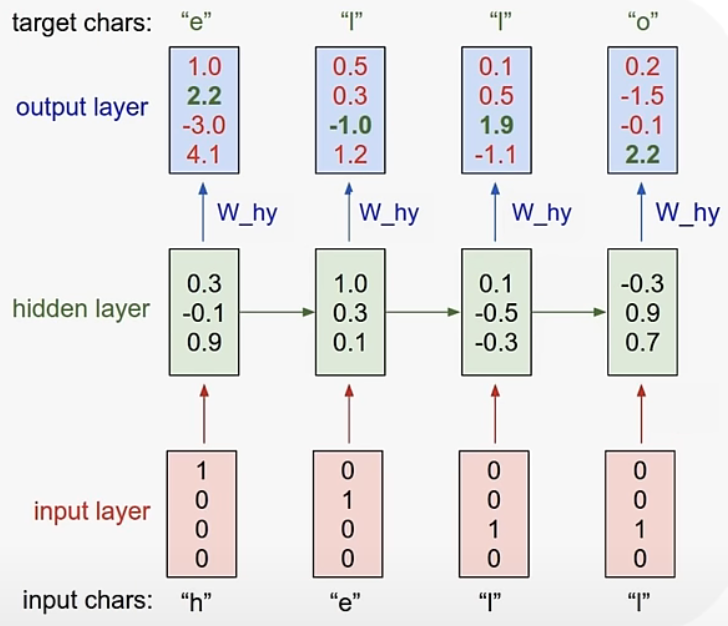
</div>

**The output will be like the image below.**

<div>
  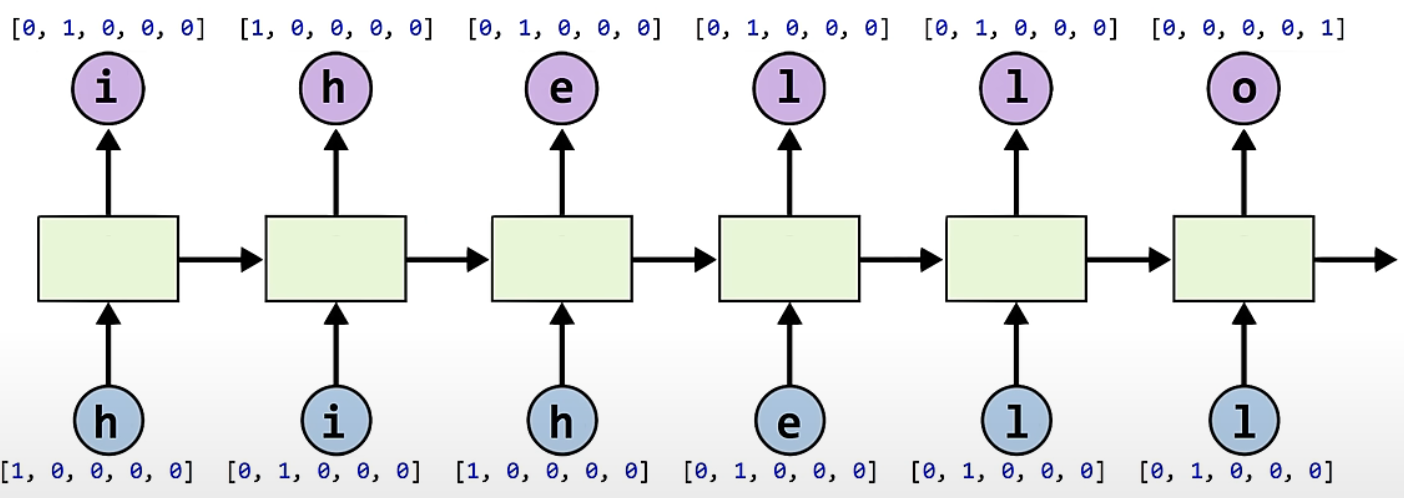
</div>

Using one hot encode

In [ ]:
# Lab 12 RNN
import numpy as np
import tensorflow as tf

idx2char = ['h', 'i', 'e', 'l', 'o']
# Teach hello: hihell -> ihello
# x_data = [[0, 1, 0, 2, 3, 3]]  # hihell
y_data = [[1, 0, 2, 3, 3, 4]]  # ihello

num_classes = 5
input_dim = 5  # one-hot size, same as hidden_size to directly predict one-hot
sequence_length = 6  # |ihello| == 6
learning_rate = 0.1

x_one_hot = np.array([[[1, 0, 0, 0, 0],    # h 0
                       [0, 1, 0, 0, 0],    # i 1
                       [1, 0, 0, 0, 0],    # h 0
                       [0, 0, 1, 0, 0],    # e 2
                       [0, 0, 0, 1, 0],    # l 3
                       [0, 0, 0, 1, 0]]],  # l 3
                     dtype=np.float32)

y_one_hot = tf.keras.utils.to_categorical(y_data, num_classes=num_classes)
print(x_one_hot.shape)
print(y_one_hot.shape)

tf.model = tf.keras.Sequential()

(1, 6, 5)
(1, 6, 5)


**Set the cell (filter)**

In [ ]:
# make cell and add it to RNN layer
# input_shape = (1,6,5) => number of sequence (batch), length of sequence, size of input dim
cell = tf.keras.layers.LSTMCell(units=num_classes, input_shape=(sequence_length, input_dim))
tf.model.add(tf.keras.layers.RNN(cell=cell, return_sequences=True))
# single LSTM layer can be used as well instead of creating LSTMCell
# tf.model.add(tf.keras.layers.LSTM(units=num_classes, input_shape=(sequence_length, input_dim), return_sequences=True))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/lstm.py:115: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


**Set the model**

In [ ]:
# fully connected layer
tf.model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(units=num_classes, activation='softmax')))

tf.model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                 metrics=['accuracy'])

**Train and predict**

In [ ]:
# train
tf.model.fit(x_one_hot, y_one_hot, epochs=50)
tf.model.summary()

predictions = tf.model.predict(x_one_hot)
for i, prediction in enumerate(predictions):
    print(prediction)
    # print char using argmax, dict
    result_str = [idx2char[c] for c in np.argmax(prediction, axis=1)]
    print("\tPrediction str: ", ''.join(result_str))

# **Character Sequence RNN**

In [ ]:
# Lab 12 Character Sequence RNN
import tensorflow as tf
import numpy as np

sample = " if you want you"
idx2char = list(set(sample))  # index -> char
char2idx = {c: i for i, c in enumerate(idx2char)}  # char -> idex

# hyper parameters
dic_size = len(char2idx)  # RNN input size (one hot size)
hidden_size = len(char2idx)  # RNN output size
num_classes = len(char2idx)  # final output size (RNN or softmax, etc.)
batch_size = 1  # one sample data, one batch
sequence_length = len(sample) - 1  # number of lstm rollings (unit #)
learning_rate = 0.1

sample_idx = [char2idx[c] for c in sample]  # char to index
x_data = [sample_idx[:-1]]  # X data sample (0 ~ n-1) hello: hell
y_data = [sample_idx[1:]]   # Y label sample (1 ~ n) hello: ello

x_one_hot_eager = tf.one_hot(x_data, num_classes)  # one hot: 1 -> 0 1 0 0 0 0 0 0 0 0
x_one_hot_numpy = tf.keras.utils.to_categorical(x_data, num_classes)  # it'll generate numpy array, either way works
y_one_hot_eager = tf.one_hot(y_data, num_classes)

tf.model = tf.keras.Sequential();
tf.model.add(tf.keras.layers.
             LSTM(units=num_classes, input_shape=(sequence_length, x_one_hot_eager.shape[2]), return_sequences=True))
tf.model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(units=num_classes, activation='softmax')))
tf.model.summary()
tf.model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                 metrics=['accuracy'])
tf.model.fit(x_one_hot_eager, y_one_hot_eager, epochs=50)


predictions = tf.model.predict(x_one_hot_eager)

for i, prediction in enumerate(predictions):
    # print char using argmax, dict
    result_str = [idx2char[c] for c in np.argmax(prediction, axis=1)]
    print("\tPrediction str: ", ''.join(result_str))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 15, 10)              │             840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed (TimeDistributed)   │ (None, 15, 10)              │             110 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 950 (3.71 KB)

 Trainable params: 950 (3.71 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.1333 - loss: 2.3068
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.2000 - loss: 2.1574
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - accuracy: 0.2000 - loss: 2.0265
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.4667 - loss: 1.8479
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - accuracy: 0.3333 - loss: 1.6476
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 0.5333 - loss: 1.3636
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.8000 - loss: 1.1228
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.8000 - loss: 0.8975
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.8000 - loss: 0.7087
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.8667 - loss: 0.5501
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.9333 - loss: 0.4259
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 1.0000 - loss: 

# **Long Character RNN**

In [ ]:
import tensorflow as tf
import numpy as np

sentence = ("if you want to build a ship, don't drum up people together to "
            "collect wood and don't assign them tasks and work, but rather "
            "teach them to long for the endless immensity of the sea.")

char_set = list(set(sentence))
char_dic = {w: i for i, w in enumerate(char_set)}

data_dim = len(char_set)
hidden_size = len(char_set)
num_classes = len(char_set)
sequence_length = 10  # Any arbitrary number
learning_rate = 0.1

dataX = []
dataY = []
for i in range(0, len(sentence) - sequence_length):
    x_str = sentence[i:i + sequence_length]
    y_str = sentence[i + 1: i + sequence_length + 1]
    print(i, x_str, '->', y_str)

    x = [char_dic[c] for c in x_str]  # x str to index
    y = [char_dic[c] for c in y_str]  # y str to index

    dataX.append(x)
    dataY.append(y)

batch_size = len(dataX)

# One-hot encoding
X_one_hot = tf.one_hot(dataX, num_classes)
Y_one_hot = tf.one_hot(dataY, num_classes)

print(X_one_hot.shape)  # check out the shape (170, 10, 25)
print(Y_one_hot.shape)  # check out the shape


tf.model = tf.keras.Sequential();
tf.model.add(tf.keras.layers.
             LSTM(units=num_classes, input_shape=(sequence_length, X_one_hot.shape[2]), return_sequences=True))
tf.model.add(tf.keras.layers.LSTM(units=num_classes, return_sequences=True))
tf.model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(units=num_classes, activation='softmax')))
tf.model.summary()
tf.model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                 metrics=['accuracy'])
tf.model.fit(X_one_hot, Y_one_hot, epochs=100)


results = tf.model.predict(X_one_hot)
for j, result in enumerate(results):
    index = np.argmax(result, axis=1)
    if j == 0:  # print all for the first result to make a sentence
        print(''.join([char_set[t] for t in index]), end='')
    else:
        print(char_set[index[-1]], end='')


# **RNN Stock Prediction**

(505, 7, 5)
(505, 1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 1)                   │              28 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30 (120.00 B)

 Trainable params: 30 (120.00 B)

 Non-trainable params: 0 (0.00 B)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


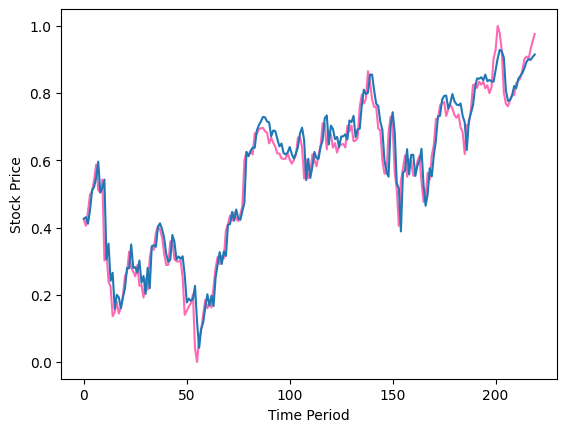

In [ ]:
'''
This script shows how to predict stock prices using a basic RNN
'''
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


def MinMaxScaler(data):
    ''' Min Max Normalization

    Parameters
    ----------
    data : numpy.ndarray
        input data to be normalized
        shape: [Batch size, dimension]

    Returns
    ----------
    data : numpy.ndarry
        normalized data
        shape: [Batch size, dimension]

    References
    ----------
    .. [1] http://sebastianraschka.com/Articles/2014_about_feature_scaling.html

    '''
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)


# train Parameters
seq_length = 7
data_dim = 5
output_dim = 1
learning_rate = 0.01
iterations = 500

# Open, High, Low, Volume, Close
xy = np.loadtxt('data-02-stock_daily.csv', delimiter=',')
xy = xy[::-1]  # reverse order (chronically ordered)

# train/test split
train_size = int(len(xy) * 0.7)
train_set = xy[0:train_size]
test_set = xy[train_size - seq_length:]  # Index from [train_size - seq_length] to utilize past sequence

# Scale each
train_set = MinMaxScaler(train_set)
test_set = MinMaxScaler(test_set)

# build datasets
def build_dataset(time_series, seq_length):
    dataX = []
    dataY = []
    for i in range(0, len(time_series) - seq_length):
        x = time_series[i:i + seq_length, :]
        y = time_series[i + seq_length, [-1]]  # Next close price
        dataX.append(x)
        dataY.append(y)
    return np.array(dataX), np.array(dataY)

trainX, trainY = build_dataset(train_set, seq_length)
testX, testY = build_dataset(test_set, seq_length)

print(trainX.shape)  # (505, 7, 5)
print(trainY.shape)

tf.model = tf.keras.Sequential();
tf.model.add(tf.keras.layers.LSTM(units=1, input_shape=(seq_length, data_dim)))
tf.model.add(tf.keras.layers.Dense(units=output_dim, activation='tanh'))
tf.model.summary()

tf.model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
tf.model.fit(trainX, trainY, epochs=iterations, verbose=0)


# Test step
test_predict = tf.model.predict(testX)

# Plot predictions
plt.plot(testY, c="hotpink")
plt.plot(test_predict)
plt.xlabel("Time Period")
plt.ylabel("Stock Price")
plt.show()